In [1]:
import warnings
warnings.filterwarnings('ignore')
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
#import chart_studio.plotly as py
import plotly.graph_objects as go
from pandas_datareader import data as web 
from datetime import datetime as dt
import plotly.express as px
import plotly.offline as py
from plotly.subplots import make_subplots
# Set style & figures inline
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
sns.set()
import plotly.io as pio

pio.renderers
%matplotlib inline

In [2]:
df= pd.read_csv( 'covid_19_data.csv')

In [3]:
df.tail(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0
116804,116805,09/23/2020,Zuid-Holland,Netherlands,2020-09-24 04:23:38,29513.0,1372.0,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [6]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,116805.000000,1.168050e+05,116805.000000,1.168050e+05
mean,58403.000000,1.908217e+04,777.745473,1.117002e+04
std,33718.843434,5.825465e+04,2859.184068,6.258701e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,29202.000000,2.450000e+02,3.000000,4.000000e+00
50%,58403.000000,2.148000e+03,42.000000,4.260000e+02
75%,87604.000000,1.037400e+04,331.000000,3.829000e+03
max,116805.000000,1.242770e+06,42072.000000,2.670256e+06


In [7]:
df = df.drop(['SNo','Last Update'],axis=1)
df = df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'})
df.head()


,Date,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [8]:
df.tail()


,Date,State,Country,Confirmed,Deaths,Recovered
116800,09/23/2020,Zaporizhia Oblast,Ukraine,3149.0,49.0,1158.0
116801,09/23/2020,Zeeland,Netherlands,1270.0,72.0,0.0
116802,09/23/2020,Zhejiang,Mainland China,1282.0,1.0,1272.0
116803,09/23/2020,Zhytomyr Oblast,Ukraine,5191.0,92.0,2853.0
116804,09/23/2020,Zuid-Holland,Netherlands,29513.0,1372.0,0.0


In [9]:
confirmed=df.loc[df['Date'] == '09/23/2020']
confirmed = confirmed.groupby(['Country']).sum()[['Confirmed','Recovered','Deaths']].sort_values(by=['Confirmed'], ascending=False)
confirmed.head()


,Confirmed,Recovered,Deaths
Country,,,
US,6933548.0,2670256.0,201884.0
India,5646010.0,4587613.0,90020.0
Brazil,4591364.0,4046827.0,138105.0
Russia,1117487.0,920602.0,19720.0
Colombia,784268.0,662277.0,24746.0


In [10]:
df.Date = pd.to_datetime(df.Date.astype(str), dayfirst=False, errors='coerce')

In [11]:
df.Date.tail()

116800   2020-09-23
116801   2020-09-23
116802   2020-09-23
116803   2020-09-23
116804   2020-09-23
Name: Date, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       116805 non-null  datetime64[ns]
 1   State      81452 non-null   object        
 2   Country    116805 non-null  object        
 3   Confirmed  116805 non-null  float64       
 4   Deaths     116805 non-null  float64       
 5   Recovered  116805 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.3+ MB


In [13]:
cumulative_confirmed = df.groupby('Date').Confirmed.sum()
cumulative_confirmed = cumulative_confirmed.groupby(cumulative_confirmed.index.to_period('y')).cumsum().reset_index()
for i in range(245,0,-1):
    cumulative_confirmed['Confirmed'].iloc[i] = cumulative_confirmed['Confirmed'].iloc[i]-cumulative_confirmed['Confirmed'].iloc[i-1]
cumulative_confirmed.head()


,Date,Confirmed
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


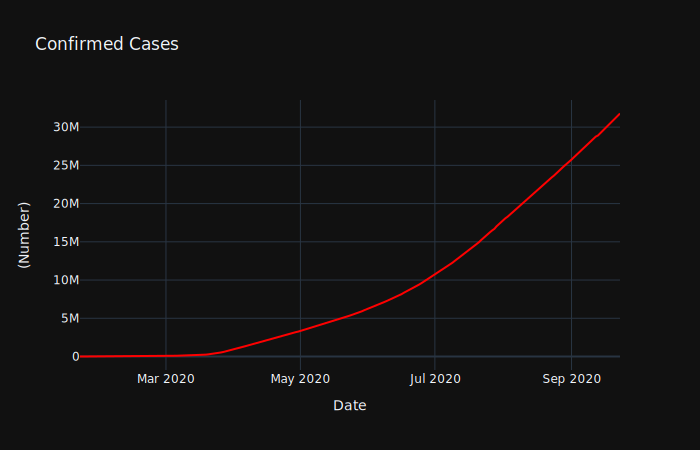

In [14]:
confirmed_graph = go.Scatter(x=cumulative_confirmed.Date,y=cumulative_confirmed.Confirmed, marker=dict(color='red'))
layout = go.Layout(title='Confirmed Cases', xaxis=dict(title='Date'), yaxis=dict(title='(Number)'))
fig = go.Figure(data=[confirmed_graph], layout=layout)
fig.update_layout(template='plotly_dark')
fig.show("svg")

In [15]:
cumulative_recovered = df.groupby('Date').Recovered.sum()
cumulative_recovered = cumulative_recovered.groupby(cumulative_recovered.index.to_period('y')).cumsum().reset_index()
for i in range(245,0,-1):
    cumulative_recovered['Recovered'].iloc[i] = cumulative_recovered['Recovered'].iloc[i]-cumulative_recovered['Recovered'].iloc[i-1]
cumulative_recovered.head(10)


,Date,Recovered
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0
5,2020-01-27,61.0
6,2020-01-28,107.0
7,2020-01-29,126.0
8,2020-01-30,143.0
9,2020-01-31,222.0


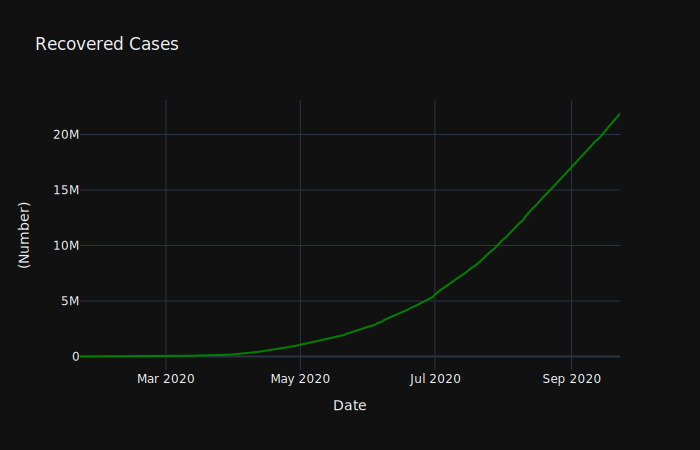

In [16]:
recovered_graph = go.Scatter(x=cumulative_recovered.Date,y=cumulative_recovered.Recovered, marker=dict(color='green'))
layout = go.Layout(title='Recovered Cases', xaxis=dict(title='Date'), yaxis=dict(title='(Number)'))
fig = go.Figure(data=[recovered_graph], layout=layout)
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")

In [17]:
cumulative_deaths = df.groupby('Date').Deaths.sum()
cumulative_deaths = cumulative_deaths.groupby(cumulative_deaths.index.to_period('y')).cumsum().reset_index()
for i in range(245,0,-1):
    cumulative_deaths['Deaths'].iloc[i] = cumulative_deaths['Deaths'].iloc[i]-cumulative_deaths['Deaths'].iloc[i-1]
cumulative_deaths.head(10)

,Date,Deaths
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0
5,2020-01-27,82.0
6,2020-01-28,131.0
7,2020-01-29,133.0
8,2020-01-30,171.0
9,2020-01-31,213.0


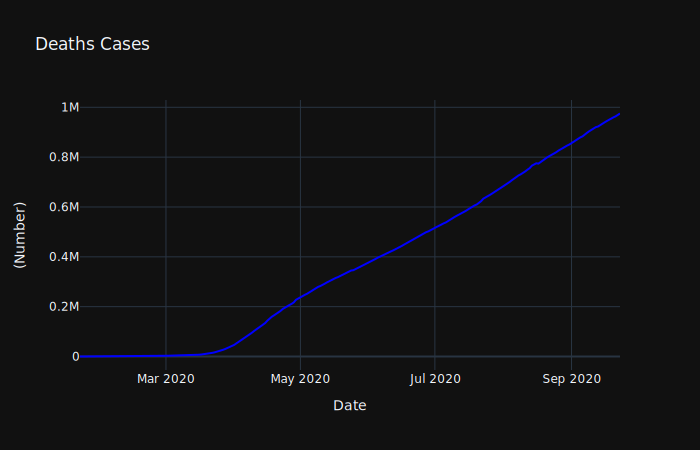

In [18]:
death_graph = go.Scatter(x=cumulative_deaths.Date,y=cumulative_deaths.Deaths, marker=dict(color='blue'))
layout = go.Layout(title='Deaths Cases', xaxis=dict(title='Date'), yaxis=dict(title='(Number)'))
fig = go.Figure(data=[death_graph], layout=layout)
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")

In [19]:
cumulative_final=pd.concat([cumulative_recovered,cumulative_confirmed.drop(['Date'],axis =1),cumulative_deaths.drop(['Date'],axis =1)],axis=1,sort=False)
cumulative_final.head(10)

,Date,Recovered,Confirmed,Deaths
0,2020-01-22,28.0,555.0,17.0
1,2020-01-23,30.0,653.0,18.0
2,2020-01-24,36.0,941.0,26.0
3,2020-01-25,39.0,1438.0,42.0
4,2020-01-26,52.0,2118.0,56.0
5,2020-01-27,61.0,2927.0,82.0
6,2020-01-28,107.0,5578.0,131.0
7,2020-01-29,126.0,6165.0,133.0
8,2020-01-30,143.0,8235.0,171.0
9,2020-01-31,222.0,9925.0,213.0


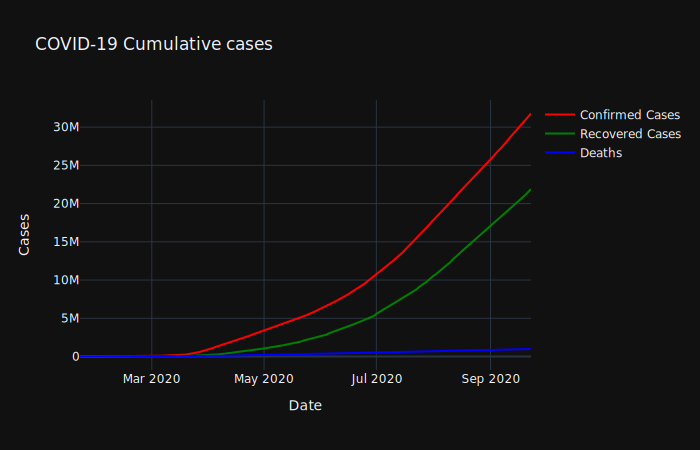

In [20]:

trace_Confirmed = go.Scatter(x=cumulative_final.Date,
                  y=cumulative_final.Confirmed,
                  name='Confirmed Cases',
                  marker=dict(color='red'))

trace_Recovered = go.Scatter(x=cumulative_final.Date,
                y=cumulative_final.Recovered,
                name='Recovered Cases',
                marker=dict(color='green'))

trace_Deaths = go.Scatter(x=cumulative_final.Date,
                y=cumulative_final.Deaths,
                name='Deaths',
                marker=dict(color='blue'))

data = [trace_Confirmed, trace_Recovered, trace_Deaths]

layout = go.Layout(title="COVID-19 Cumulative cases",
                xaxis=dict(title='Date'),
                yaxis=dict(title='Cases'))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")

In [21]:
per_day_cases=cumulative_final.copy()
for i in range(245,0,-1):
    per_day_cases['Deaths'].iloc[i] = per_day_cases['Deaths'].iloc[i]-per_day_cases['Deaths'].iloc[i-1]
    per_day_cases['Confirmed'].iloc[i] = per_day_cases['Confirmed'].iloc[i]-per_day_cases['Confirmed'].iloc[i-1]
    per_day_cases['Recovered'].iloc[i] = per_day_cases['Recovered'].iloc[i]-per_day_cases['Recovered'].iloc[i-1]
per_day_cases.head(10)

,Date,Recovered,Confirmed,Deaths
0,2020-01-22,28.0,555.0,17.0
1,2020-01-23,2.0,98.0,1.0
2,2020-01-24,6.0,288.0,8.0
3,2020-01-25,3.0,497.0,16.0
4,2020-01-26,13.0,680.0,14.0
5,2020-01-27,9.0,809.0,26.0
6,2020-01-28,46.0,2651.0,49.0
7,2020-01-29,19.0,587.0,2.0
8,2020-01-30,17.0,2070.0,38.0
9,2020-01-31,79.0,1690.0,42.0


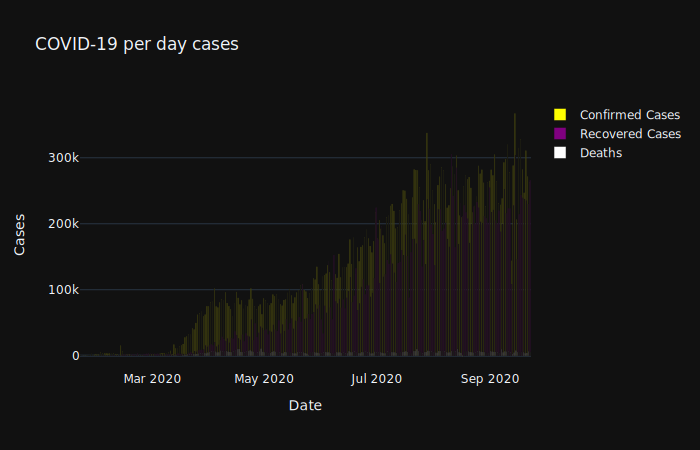

In [22]:
trace_Confirmed = go.Bar(x=per_day_cases.Date,
                  y=per_day_cases.Confirmed,
                  name='Confirmed Cases',
                  marker=dict(color='yellow'))

trace_Recovered = go.Bar(x=per_day_cases.Date,
                y=per_day_cases.Recovered,
                name='Recovered Cases',
                marker=dict(color='purple'))

trace_Deaths = go.Bar(x=per_day_cases.Date,
                y=per_day_cases.Deaths,
                name='Deaths',
                marker=dict(color='white'))

data = [trace_Confirmed, trace_Recovered, trace_Deaths]

layout = go.Layout(title="COVID-19 per day cases",
                xaxis=dict(title='Date'),
                yaxis=dict(title='Cases'))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(template='plotly_dark')

fig.show(renderer="svg")

In [23]:
confirmed['Mortality_rate'] =( confirmed['Deaths']/confirmed['Confirmed']*100) 
confirmed['Recovery_rate'] =( confirmed['Recovered']/confirmed['Confirmed']*100) 
confirmed.head(10)

,Confirmed,Recovered,Deaths,Mortality_rate,Recovery_rate
Country,,,,,
US,6933548.0,2670256.0,201884.0,2.911698,38.512115
India,5646010.0,4587613.0,90020.0,1.594400,81.254071
Brazil,4591364.0,4046827.0,138105.0,3.007930,88.139973
Russia,1117487.0,920602.0,19720.0,1.764674,82.381451
Colombia,784268.0,662277.0,24746.0,3.155299,84.445241
Peru,776546.0,636489.0,31568.0,4.065181,81.964108
Mexico,710049.0,601611.0,74949.0,10.555469,84.728096
Spain,693556.0,150376.0,31034.0,4.474621,21.681883
South Africa,665188.0,594229.0,16206.0,2.436304,89.332489


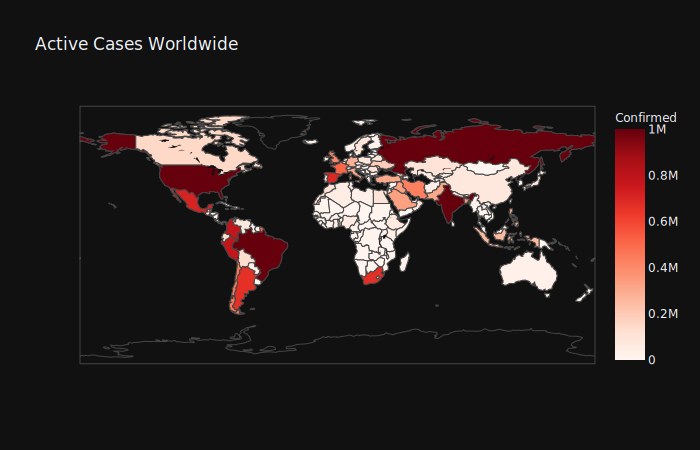

In [24]:
worldplot=confirmed.reset_index()
fig = px.choropleth(worldplot, locations="Country", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country", range_color=[1,1000000], 
                    color_continuous_scale="Reds", 
                    title='Active Cases Worldwide')
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")

In [25]:
worldplot[["Country","Confirmed","Recovered","Deaths","Mortality_rate","Recovery_rate"]].sort_values(["Confirmed"],ascending=False).style.background_gradient(cmap="Reds")

,Country,Confirmed,Recovered,Deaths,Mortality_rate,Recovery_rate
0,US,6933548.000000,2670256.000000,201884.000000,2.911698,38.512115
1,India,5646010.000000,4587613.000000,90020.000000,1.594400,81.254071
2,Brazil,4591364.000000,4046827.000000,138105.000000,3.007930,88.139973
3,Russia,1117487.000000,920602.000000,19720.000000,1.764674,82.381451
4,Colombia,784268.000000,662277.000000,24746.000000,3.155299,84.445241
5,Peru,776546.000000,636489.000000,31568.000000,4.065181,81.964108
6,Mexico,710049.000000,601611.000000,74949.000000,10.555469,84.728096
7,Spain,693556.000000,150376.000000,31034.000000,4.474621,21.681883
8,South Africa,665188.000000,594229.000000,16206.000000,2.436304,89.332489
9,Argentina,664799.000000,525486.000000,14376.000000,2.162458,79.044343


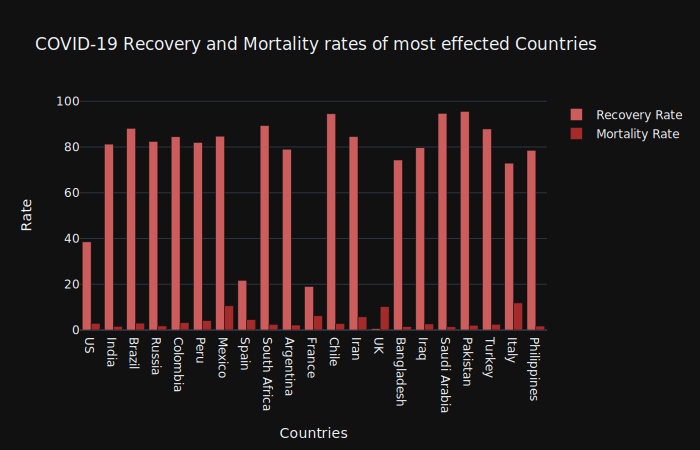

In [26]:
countries=confirmed.iloc[0:21]
countries=countries.reset_index()

trace_recovery_rate = go.Bar(x=countries.Country,
                  y=countries.Recovery_rate,
                  name='Recovery Rate',
                  marker=dict(color='indianred'))

trace_mortality_rate = go.Bar(x=countries.Country,
                  y=countries.Mortality_rate,
                  name='Mortality Rate',
                  marker=dict(color='brown')) 


data = [trace_recovery_rate, trace_mortality_rate]

layout = go.Layout(title="COVID-19 Recovery and Mortality rates of most effected Countries",
                xaxis=dict(title='Countries'),
                yaxis=dict(title='Rate'))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(template='plotly_dark')

fig.show(renderer="svg")

In [27]:
mortality=confirmed.sort_values(by=['Mortality_rate'], ascending=False)
mortality.head()


,Confirmed,Recovered,Deaths,Mortality_rate,Recovery_rate
Country,,,,,
Yemen,2029.0,1245.0,586.0,28.881222,61.360276
MS Zaandam,9.0,0.0,2.0,22.222222,0.000000
Italy,302537.0,220665.0,35758.0,11.819381,72.938186
Mexico,710049.0,601611.0,74949.0,10.555469,84.728096
UK,412245.0,2247.0,41951.0,10.176230,0.545064


In [28]:
recovery=confirmed.sort_values(by=['Recovery_rate'], ascending=False)
recovery.head()

,Confirmed,Recovered,Deaths,Mortality_rate,Recovery_rate
Country,,,,,
Holy See,12.0,12.0,0.0,0.0,100.0
Timor-Leste,27.0,27.0,0.0,0.0,100.0
Macau,46.0,46.0,0.0,0.0,100.0
Saint Vincent and the Grenadines,64.0,64.0,0.0,0.0,100.0
Grenada,24.0,24.0,0.0,0.0,100.0


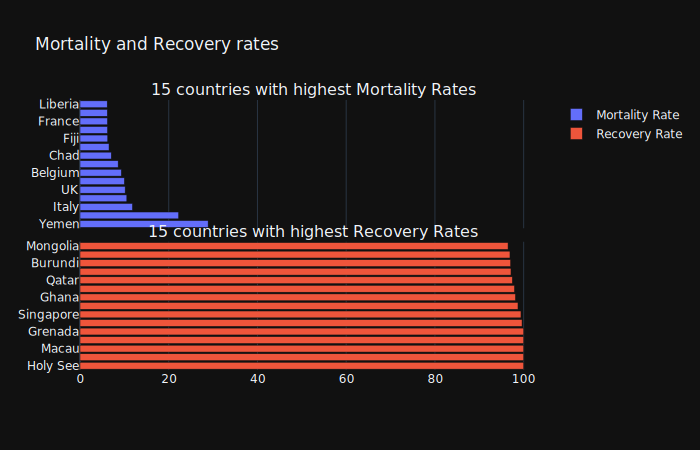

In [29]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("15 countries with highest Mortality Rates","15 countries with highest Recovery Rates"),
    shared_xaxes=True,
    shared_yaxes=False,
    vertical_spacing=0.05)

top_15_mortality=mortality.sort_values(["Mortality_rate"],ascending=False).head(15)
top_15_recovery=recovery.sort_values(["Recovery_rate"],ascending=False).head(15)

fig.append_trace(go.Bar(
    x=top_15_mortality["Mortality_rate"],
    y=top_15_mortality.index,
    orientation ='h',
    #marker=dict(color='blue'),
    name="Mortality Rate"
), row=1, col=1)

fig.append_trace(go.Bar(
    x=top_15_recovery["Recovery_rate"],
    y=top_15_recovery.index,
    orientation ='h',
    name="Recovery Rate"
), row=2, col=1)
fig.update_layout(height=1000, width=800, title_text="Mortality and Recovery rates")
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")
#fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
#top_15_mortality=mortality.sort_values(["Mortality_rate"],ascending=False).head(15)
#top_15_recovery=recovery.sort_values(["Recovery_rate"],ascending=False).head(15)
#sns.barplot(x=top_15_mortality["Mortality_rate"],y=top_15_mortality.index,ax=ax1)
#ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
#sns.barplot(x=top_15_recovery["Recovery_rate"],y=top_15_recovery.index,ax=ax2)
#ax2.set_title("Top 15 countries as per Number of Death Cases")


In [30]:
datewise=cumulative_final
datewise=datewise.set_index("Date")
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
datewise.head()

,Recovered,Confirmed,Deaths,Days Since
Date,,,,
2020-01-22,28.0,555.0,17.0,0
2020-01-23,30.0,653.0,18.0,1
2020-01-24,36.0,941.0,26.0,2
2020-01-25,39.0,1438.0,42.0,3
2020-01-26,52.0,2118.0,56.0,4


Average increase in number of Confirmed Cases every day:  129184.0
Average increase in number of Recovered Cases every day:  88985.0
Average increase in number of Deaths Cases every day:  3964.0


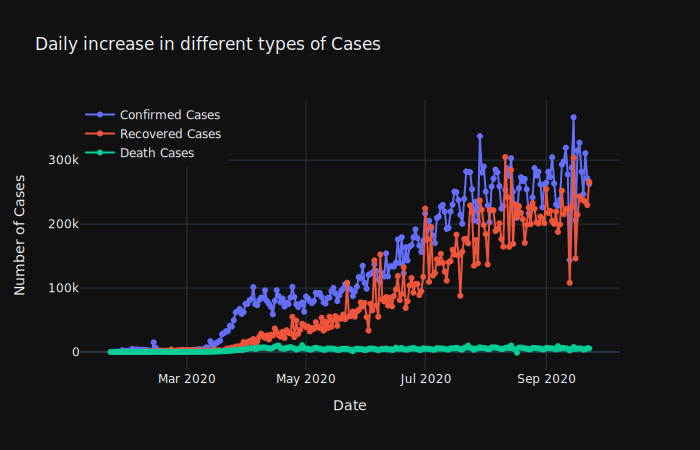

In [31]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")

LinearRegression

In [32]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [33]:
lin_reg=LinearRegression(normalize=True)

In [34]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(normalize=True)

In [35]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [36]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  7830571.030601998


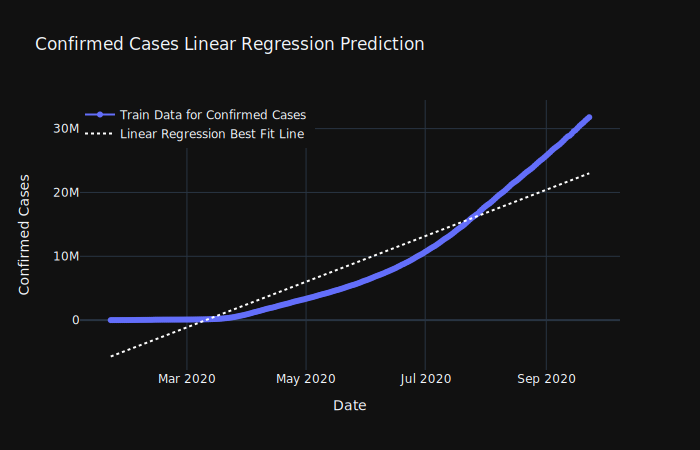

<Figure size 792x432 with 0 Axes>

In [37]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='white', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark')                 
fig.show(renderer="svg")

Polynomial Regression

In [38]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [39]:
poly = PolynomialFeatures(degree = 8) 

In [40]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [41]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [42]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  985900.2801263804


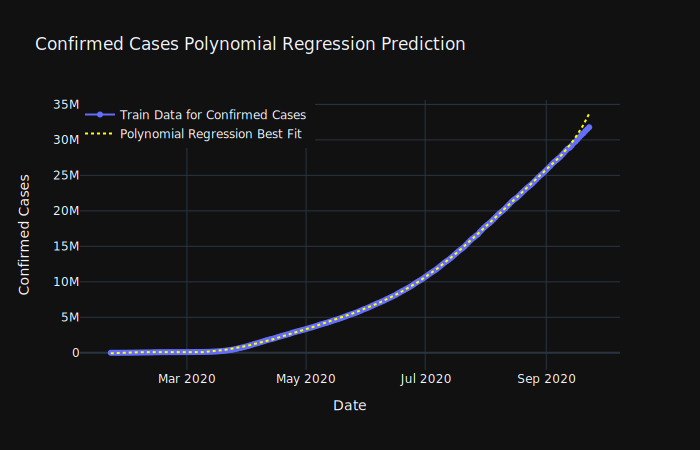

<Figure size 792x432 with 0 Axes>

In [43]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='yellow', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark')  
fig.show(renderer="svg")

In [44]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

SVM

In [45]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [46]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [47]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [48]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [49]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  9793495.12240128


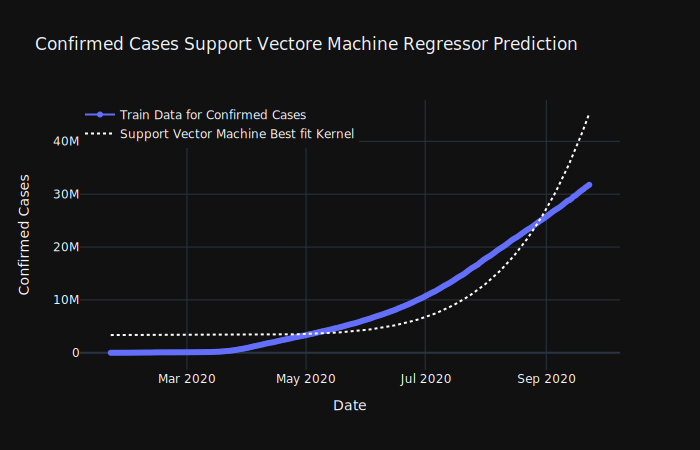

<Figure size 792x432 with 0 Axes>

In [50]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='white', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark') 
fig.show(renderer="svg")

In [51]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [52]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2020-09-24,23113975.222954,34318786.968815,46306357.160791
1,2020-09-25,23231108.623613,34952218.800290,47364738.610866
2,2020-09-26,23348242.024271,35625017.197148,48444763.017170
3,2020-09-27,23465375.424930,36340167.331791,49546783.004272
4,2020-09-28,23582508.825588,37100814.713963,50671155.488235


## Time SEries

Holt

In [53]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [54]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False)

In [55]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  172021.58712565133


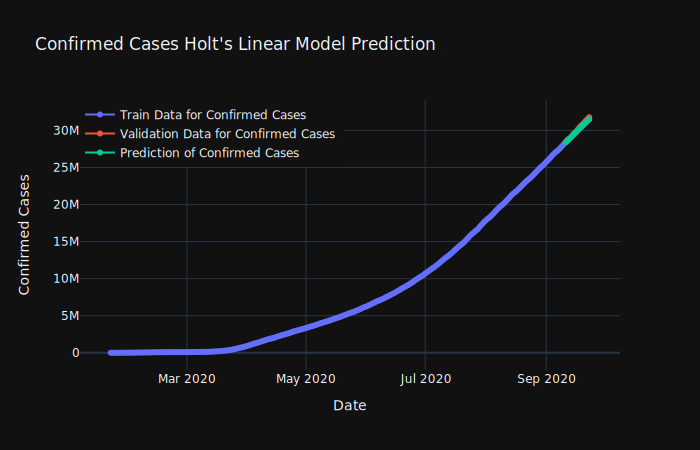

In [56]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark')
fig.show(renderer="svg")

In [57]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-09-24,23113975.222954,34318786.968815,46306357.160791,31773237.703331
1,2020-09-25,23231108.623613,34952218.800290,47364738.610866,32033255.137821
2,2020-09-26,23348242.024271,35625017.197148,48444763.017170,32293272.572310
3,2020-09-27,23465375.424930,36340167.331791,49546783.004272,32553290.006800
4,2020-09-28,23582508.825588,37100814.713963,50671155.488235,32813307.441290


Holts winter

In [58]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [59]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

In [60]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  119882.62182205531


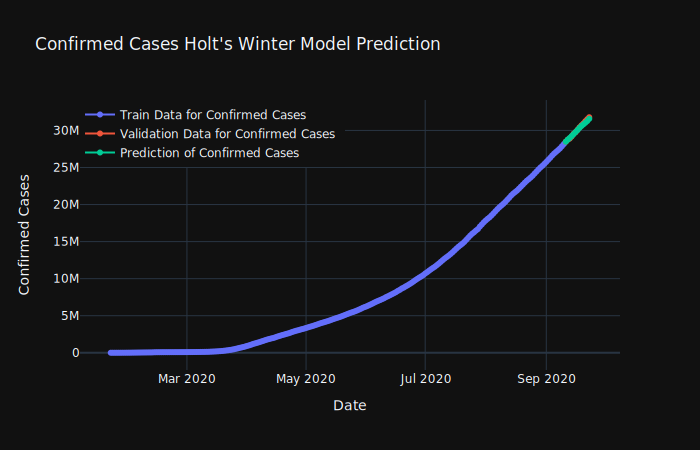

In [61]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark')                
fig.show(renderer="svg")

In [62]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-09-24,23113975.222954,34318786.968815,46306357.160791,31773237.703331,31883641.972602
1,2020-09-25,23231108.623613,34952218.800290,47364738.610866,32033255.137821,32196768.569097
2,2020-09-26,23348242.024271,35625017.197148,48444763.017170,32293272.572310,32476862.358114
3,2020-09-27,23465375.424930,36340167.331791,49546783.004272,32553290.006800,32703353.837353
4,2020-09-28,23582508.825588,37100814.713963,50671155.488235,32813307.441290,32957964.729434


In [63]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

AR MODEL

In [64]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5238.720, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5226.902, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5227.881, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5188.886, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=5143.415, Time=0.09 sec
Total fit time: 0.189 seconds


ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True)

In [65]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [66]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  37251.69663112116


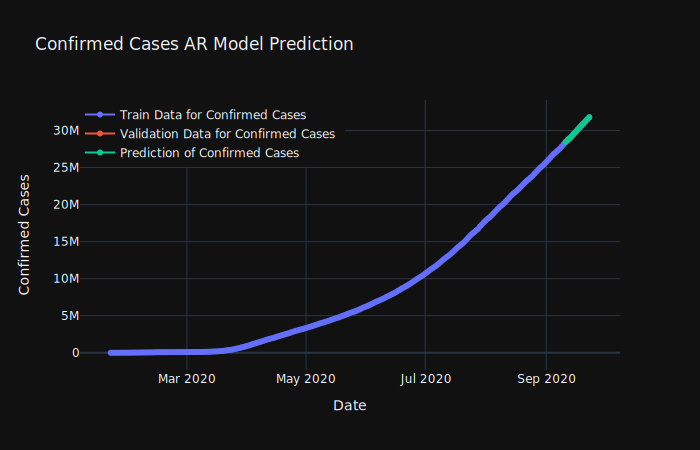

In [67]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark')                  
fig.show(renderer="svg")

In [68]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-09-24,23113975.222954,34318786.968815,46306357.160791,31773237.703331,31883641.972602,32075547.701778
1,2020-09-25,23231108.623613,34952218.800290,47364738.610866,32033255.137821,32196768.569097,32361180.435853
2,2020-09-26,23348242.024271,35625017.197148,48444763.017170,32293272.572310,32476862.358114,32646419.980483
3,2020-09-27,23465375.424930,36340167.331791,49546783.004272,32553290.006800,32703353.837353,32935229.764365
4,2020-09-28,23582508.825588,37100814.713963,50671155.488235,32813307.441290,32957964.729434,33228808.048971


MA MODEL

In [69]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [70]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=2,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5238.720, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5218.406, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5226.234, Time=0.06 sec
Total fit time: 0.103 seconds


ARIMA(order=(0, 2, 1), scoring_args={}, suppress_warnings=True)

In [71]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [72]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))

Root Mean Square Error for MA Model:  62945.04574070125


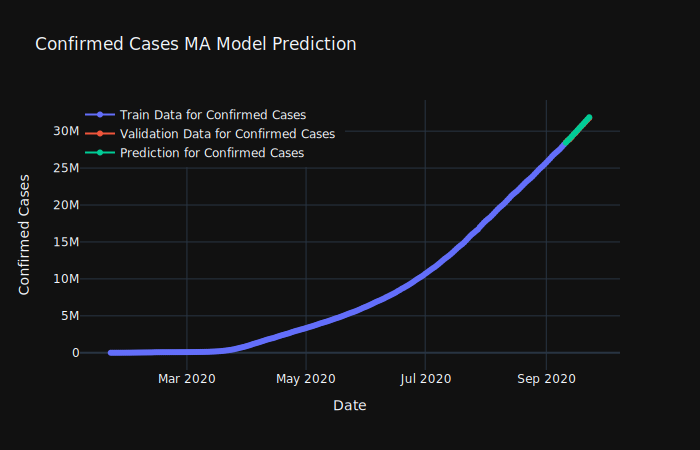

In [73]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark')  
fig.show(renderer="svg")

In [74]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-09-24,23113975.222954,34318786.968815,46306357.160791,31773237.703331,31883641.972602,32075547.701778,32179131.037687
1,2020-09-25,23231108.623613,34952218.800290,47364738.610866,32033255.137821,32196768.569097,32361180.435853,32477987.568128
2,2020-09-26,23348242.024271,35625017.197148,48444763.017170,32293272.572310,32476862.358114,32646419.980483,32778432.149887
3,2020-09-27,23465375.424930,36340167.331791,49546783.004272,32553290.006800,32703353.837353,32935229.764365,33080464.782965
4,2020-09-28,23582508.825588,37100814.713963,50671155.488235,32813307.441290,32957964.729434,33228808.048971,33384085.467362


ARIMA MODEL

In [75]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [76]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5238.720, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5218.406, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5226.234, Time=0.06 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=5226.683, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5226.902, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=5220.548, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5375.070, Time=0.18 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=5212.702, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5227.881, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=5222.985, Time=0.17 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=5224.186, Time=0.39 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=5208.092, Time=0.17 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5188.886, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=5133.067, Time=0.12 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=5086.450, Time=0.41 sec
Total fit 

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [77]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [78]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  116811.54273309378


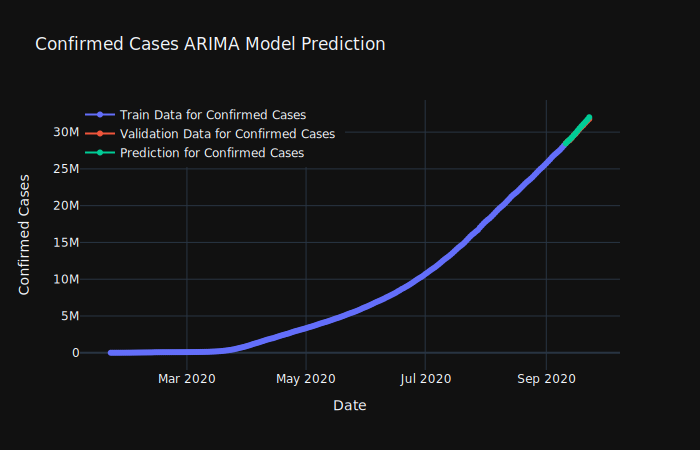

In [79]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark') 
fig.show(renderer="svg")

In [80]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-09-24,23113975.222954,34318786.968815,46306357.160791,31773237.703331,31883641.972602,32075547.701778,32179131.037687,32377577.204700
1,2020-09-25,23231108.623613,34952218.800290,47364738.610866,32033255.137821,32196768.569097,32361180.435853,32477987.568128,32730477.840911
2,2020-09-26,23348242.024271,35625017.197148,48444763.017170,32293272.572310,32476862.358114,32646419.980483,32778432.149887,33061573.414566
3,2020-09-27,23465375.424930,36340167.331791,49546783.004272,32553290.006800,32703353.837353,32935229.764365,33080464.782965,33373267.787547
4,2020-09-28,23582508.825588,37100814.713963,50671155.488235,32813307.441290,32957964.729434,33228808.048971,33384085.467362,33685381.231382


SARIMA MODEL

In [81]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=5171.866, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=5237.673, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=5137.797, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=5179.694, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=5226.426, Time=0.01 sec
 ARIMA(1,2,0)(2,0,0)[7]             : AIC=5123.124, Time=0.20 sec
 ARIMA(1,2,0)(2,0,1)[7]             : AIC=5117.732, Time=0.34 sec
 ARIMA(1,2,0)(1,0,1)[7]             : AIC=5063.135, Time=0.41 sec
 ARIMA(1,2,0)(0,0,1)[7]             : AIC=5189.197, Time=0.06 sec
 ARIMA(1,2,0)(1,0,2)[7]             : AIC=5117.727, Time=0.31 sec
 ARIMA(1,2,0)(0,0,2)[7]             : AIC=5160.948, Time=0.18 sec
 ARIMA(1,2,0)(2,0,2)[7]             : AIC=5119.085, Time=0.42 sec
 ARIMA(2,2,0)(1,0,1)[7]             : AIC=5060.706, Time=0.64 sec
 ARIMA(2,2,0)(0,0,1)[7]             : AIC=5189.370, Time=0.08 sec
 ARIMA(2,2,0)(1,0,0)[7]          

ARIMA(order=(1, 2, 2), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [82]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [83]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  105588.60269296769


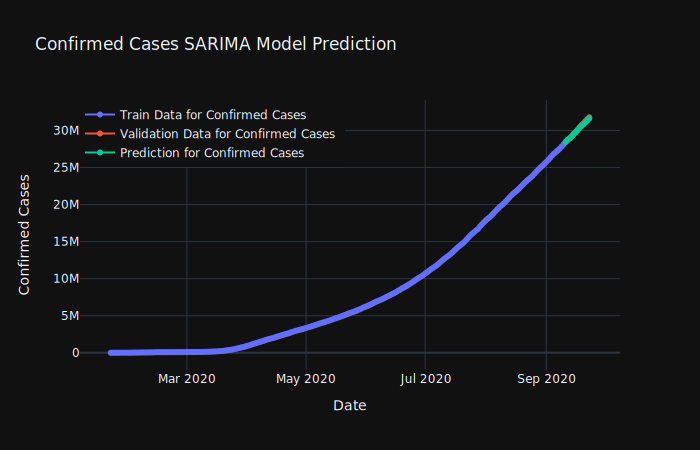

In [84]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark') 
fig.show(renderer="svg")

In [85]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,2020-09-24,23113975.222954,34318786.968815,46306357.160791,31773237.703331,31883641.972602,32075547.701778,32179131.037687,32377577.204700,31905812.778300
1,2020-09-25,23231108.623613,34952218.800290,47364738.610866,32033255.137821,32196768.569097,32361180.435853,32477987.568128,32730477.840911,32202097.077737
2,2020-09-26,23348242.024271,35625017.197148,48444763.017170,32293272.572310,32476862.358114,32646419.980483,32778432.149887,33061573.414566,32471622.850925
3,2020-09-27,23465375.424930,36340167.331791,49546783.004272,32553290.006800,32703353.837353,32935229.764365,33080464.782965,33373267.787547,32711328.235034
4,2020-09-28,23582508.825588,37100814.713963,50671155.488235,32813307.441290,32957964.729434,33228808.048971,33384085.467362,33685381.231382,32957897.393424


summary

In [86]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Holt's Linear","Holt's Winter Model",
            "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model","SARIMA Model","Facebook's Prophet Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
5,Auto Regressive Model (AR),37251.696631
6,Moving Average Model (MA),62945.045741
8,SARIMA Model,105588.602693
7,ARIMA Model,116811.542733
4,Holt's Winter Model,119882.621822
3,Holt's Linear,172021.587126
1,Polynomial Regression,985900.280126
0,Linear Regression,7830571.030602
2,Support Vector Machine Regressor,9793495.122401


Forecating for Death

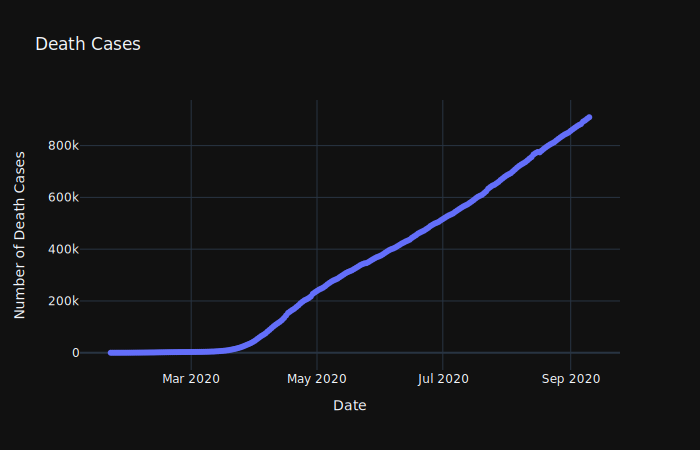

In [87]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Death Cases"))
fig.update_layout(title="Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark') 
fig.show(renderer="svg")

In [88]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [89]:
model_arima_deaths=auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,
                              max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)     
model_arima_deaths.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4002.845, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3964.048, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3948.317, Time=0.22 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3941.841, Time=0.34 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=3911.075, Time=0.55 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=3909.056, Time=0.61 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3989.453, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3947.299, Time=0.28 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3948.415, Time=0.25 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3936.109, Time=0.53 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=3904.973, Time=0.72 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3990.160, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3946.507, Time=0.27 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3947.077, Time=0.51 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3878.216, Time=0.62 sec
 ARIMA(3,2

ARIMA(order=(2, 2, 3), scoring_args={}, suppress_warnings=True)

In [90]:
predictions_deaths=model_arima_deaths.predict(len(valid))
y_pred["ARIMA Death Prediction"]=predictions_deaths

In [91]:
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(valid["Deaths"],predictions_deaths)))

Root Mean Square Error:  8711.692834610818


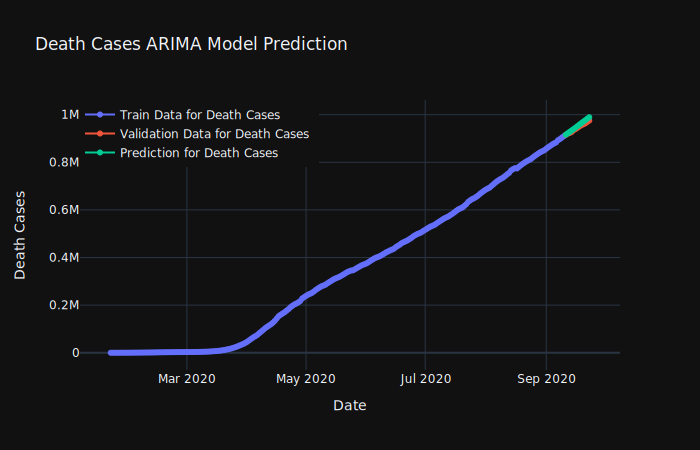

In [92]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Train Data for Death Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Deaths"],
                    mode='lines+markers',name="Validation Data for Death Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Death Prediction"],
                    mode='lines+markers',name="Prediction for Death Cases",))
fig.update_layout(title="Death Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_layout(template='plotly_dark') 
fig.show(renderer="svg")

In [93]:
ARIMA_model_death_forecast=[]
for i in range(1,18):
    ARIMA_model_death_forecast.append(model_arima_deaths.predict(len(valid)+i)[-1])

In [94]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Deaths","ARIMA Model Death Forecast"]).head()

,Deaths,ARIMA Model Death Forecast
0,2020-09-24,995443.252591
1,2020-09-25,1001908.012707
2,2020-09-26,1008340.463348
3,2020-09-27,1014656.889573
4,2020-09-28,1020875.920279
